<a href="https://colab.research.google.com/github/SreejithPS93/Chest_XRay/blob/main/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame

In [ ]:
from scipy import misc
from PIL import Image
import imageio
import keras
from matplotlib import pyplot as plt

In [ ]:
from skimage import io
X=[]
Y=[]
base_path='/content/drive/My Drive/Covid'
source_path=base_path
for child in os.listdir(source_path):
  print(child)
  sub_path = os.path.join(source_path, child)
  bsub_path = os.path.join(base_path, child)
  if os.path.isdir(sub_path):
    for data_file in os.listdir(sub_path):
      Qry = Image.open(os.path.join(sub_path, data_file))
      Qry = Qry.convert("RGB")
      Qry = np.array(Qry.resize((224,224)))
      Qry = Qry.reshape([224,224,3])
      Qry = Qry[:,:,2]
      flist=np.array(Qry)
      X.append(flist)
      Y.append(child)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Covid'

In [ ]:
images_arr = np.asarray(X)
images_arr = images_arr.astype('float32')
images_arr = images_arr / np.max(images_arr)

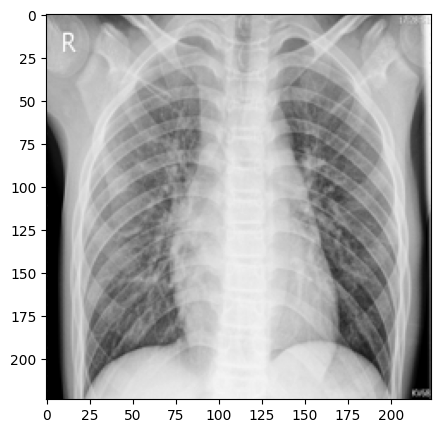

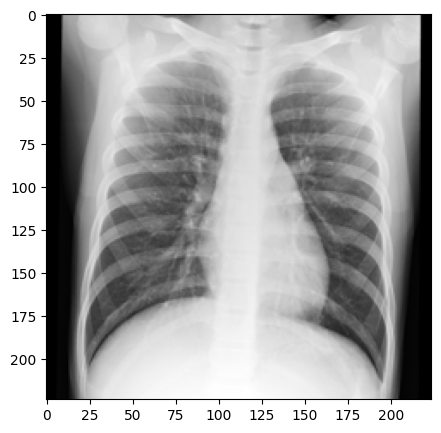

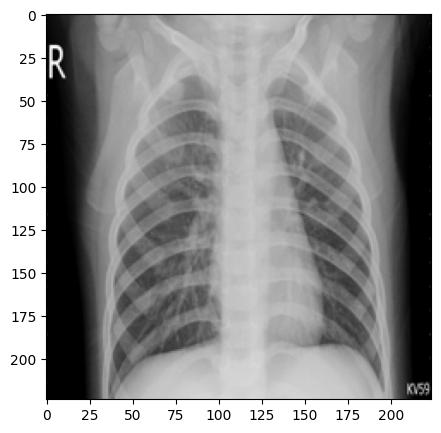

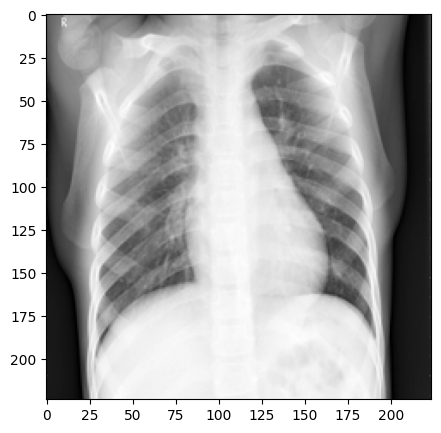

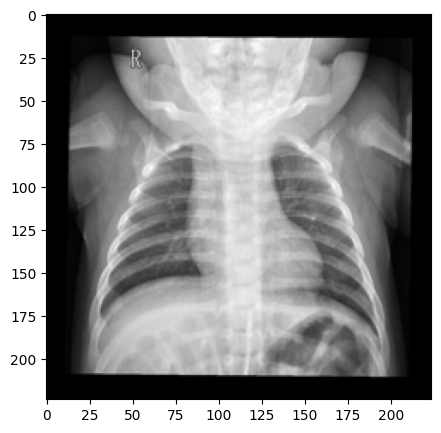

In [ ]:
for i in range(5):
  plt.figure(figsize = [5,5])
  curr_img = np.reshape(images_arr[i], (224,224))
  plt.imshow(curr_img, cmap='gray')
  plt.show()


In [ ]:
from skimage.transform import rescale, resize
X=[]
print(images_arr.shape)
for i in range(images_arr.shape[0]):
  img=resize(images_arr[i],(224,224,1),anti_aliasing=True)
  flist=np.array(img.flatten())
  X.append(flist)


(818, 224, 224)


In [ ]:
X=np.asarray(X)
X = X.astype('float32')
X.shape

(818, 50176)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
labelBinarizer = LabelBinarizer()
y=labelBinarizer.fit_transform(Y)
print(y)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


In [ ]:
len(X_train)



654

In [ ]:
len(y_train)

654

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
import random
import tensorflow as tf
from tensorflow.keras.optimizers import SGD


In [ ]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
dnnModel=Sequential()
dnnModel.add(Dense(256,activation="relu",input_shape=(50176,)))
dnnModel.add(Dense(256,activation="relu"))
dnnModel.add(Dense(128,activation="relu"))
dnnModel.add(Dense(64,activation="relu"))
dnnModel.add(Dropout(0.5))
dnnModel.add(Dense(3,activation="softmax"))
dnnModel.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │      12,845,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,952,451 (49.41 MB)

 Trainable params: 12,952,451 (49.41 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
sgd = SGD(learning_rate=0.01)
dnnModel.compile(optimizer='sgd',loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
dnnModel.fit(X_train,y_train,epochs=200,batch_size=64,verbose=1,validation_split=0.1)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 253ms/step - accuracy: 0.4445 - loss: 1.0708 - val_accuracy: 0.7879 - val_loss: 0.8659
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5748 - loss: 0.9249 - val_accuracy: 0.4242 - val_loss: 1.4784
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6233 - loss: 0.9589 - val_accuracy: 0.7879 - val_loss: 0.5988
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6364 - loss: 0.8764 - val_accuracy: 0.7879 - val_loss: 0.6097
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7142 - loss: 0.6759 - val_accuracy: 0.8030 - val_loss: 0.5974
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7568 - loss: 0.6058 - val_accuracy: 0.8030 - val_loss: 0.5323
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7674 - loss: 0.5552 - val_accuracy: 0.8182 - val_loss: 0.5366
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7649 - loss: 0.5508 - val_accuracy: 0

In [ ]:
testLoss, testAccuracy = dnnModel.evaluate(X_test,y_test)
print("Test Accuracy =", testAccuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.9616 - loss: 0.1409
Test Accuracy = 0.9451219439506531


In [ ]:
#Predict a new unseen case
image = images_arr[10]
image = image.reshape(224,224)
image = image/np.max(image)
flist = np.array(image.flatten())
img = np.asarray(flist)
img = img.astype('float32')
img = img.reshape(-1,50176)


In [ ]:
pred = dnnModel.predict(img)
pred = labelBinarizer.inverse_transform(pred)
print(pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
['NORMAL']


In [ ]:
dnnModel.save('dnnmodel.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('dnnmodel.h5')
pred = model.predict(img)
pred = labelBinarizer.inverse_transform(pred)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
['NORMAL']
